# Final

In [ ]:
df=pd.read_csv(r'/content/drive/MyDrive/final_flows.csv')
#dataset.head()
df.Label.value_counts()

vpn_voip             8247
chat                 6605
vpn_hangouts         5549
email                5071
video                5039
voip                 4860
vpn_chat             4546
file_transfer        1796
vpn_file_transfer    1794
vpn_video            1144
vpn_bittorrent        709
vpn_email             569
spotify               537
vpn_spotify           361
tor_video             170
tor_facebook            9
tor_twitter             9
tor_google              7
Name: Label, dtype: int64

In [ ]:
df=df[((df.Label != 'tor_video') &( df.Label !='tor_facebook' ) & (df.Label!= 'tor_twitter') &(df.Label!= 'tor_google') &(df.Label!= 'vpn_hangouts'))]

In [ ]:
df.Label.value_counts()

vpn_voip             8247
chat                 6605
email                5071
video                5039
voip                 4860
vpn_chat             4546
file_transfer        1796
vpn_file_transfer    1794
vpn_video            1144
vpn_bittorrent        709
vpn_email             569
spotify               537
vpn_spotify           361
Name: Label, dtype: int64

In [ ]:
df.head()

,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,12894868,12,12,2795.0,15017.0,1164.0,0.0,232.916667,437.321695,8090.0,...,32,2889326.0,0.0,2889326.0,2889326.0,7.139549e+14,1.009685e+15,1.427910e+15,10005542.0,video
1,10256014,9,9,1710.0,6889.0,571.0,0.0,190.000000,273.192240,4242.0,...,32,247101.0,0.0,247101.0,247101.0,7.139549e+14,1.009685e+15,1.427910e+15,10008913.0,video
2,10276177,9,9,1710.0,6047.0,571.0,0.0,190.000000,273.192240,3173.0,...,32,269121.0,0.0,269121.0,269121.0,7.139549e+14,1.009685e+15,1.427910e+15,10007056.0,video
3,10301350,9,10,1710.0,5518.0,571.0,0.0,190.000000,273.192240,2524.0,...,32,298055.0,0.0,298055.0,298055.0,7.139549e+14,1.009685e+15,1.427910e+15,10003295.0,video
4,13883910,27,33,3199.0,51828.0,579.0,0.0,118.481481,225.412676,6690.0,...,32,3874052.0,0.0,3874052.0,3874052.0,7.139549e+14,1.009685e+15,1.427910e+15,10009858.0,video


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41278 entries, 0 to 47021
Data columns (total 77 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Flow Duration               41278 non-null  int64  
 1   Total Fwd Packet            41278 non-null  int64  
 2   Total Bwd packets           41278 non-null  int64  
 3   Total Length of Fwd Packet  41278 non-null  float64
 4   Total Length of Bwd Packet  41278 non-null  float64
 5   Fwd Packet Length Max       41278 non-null  float64
 6   Fwd Packet Length Min       41278 non-null  float64
 7   Fwd Packet Length Mean      41278 non-null  float64
 8   Fwd Packet Length Std       41278 non-null  float64
 9   Bwd Packet Length Max       41278 non-null  float64
 10  Bwd Packet Length Min       41278 non-null  float64
 11  Bwd Packet Length Mean      41278 non-null  float64
 12  Bwd Packet Length Std       41278 non-null  float64
 13  Flow Bytes/s                412

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression as LR
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.ensemble import RandomForestClassifier as RF


from collections import Counter

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

In [ ]:
mainx= df.iloc[:,0:76].values
mainy = df.iloc [:,-1].values

In [ ]:
np.any(np.isnan(mainx))

True

In [ ]:
np.all(np.isfinite(mainx))

False

In [ ]:
# Replace infinite updated data with nan
df.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
df.dropna(inplace=True)
#print(df)

In [ ]:
data=df

In [ ]:
df.dropna(how='any') 
#dat.dropna(how='any')    #to drop if any value in the row has a nan
#dat.dropna(how='all')    #to drop if all values in the row are nan

,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,12894868,12,12,2795.0,15017.0,1164.0,0.0,232.916667,437.321695,8090.0,...,32,2889326.0,0.000000,2889326.0,2889326.0,7.139549e+14,1.009685e+15,1.427910e+15,1.000554e+07,video
1,10256014,9,9,1710.0,6889.0,571.0,0.0,190.000000,273.192240,4242.0,...,32,247101.0,0.000000,247101.0,247101.0,7.139549e+14,1.009685e+15,1.427910e+15,1.000891e+07,video
2,10276177,9,9,1710.0,6047.0,571.0,0.0,190.000000,273.192240,3173.0,...,32,269121.0,0.000000,269121.0,269121.0,7.139549e+14,1.009685e+15,1.427910e+15,1.000706e+07,video
3,10301350,9,10,1710.0,5518.0,571.0,0.0,190.000000,273.192240,2524.0,...,32,298055.0,0.000000,298055.0,298055.0,7.139549e+14,1.009685e+15,1.427910e+15,1.000330e+07,video
4,13883910,27,33,3199.0,51828.0,579.0,0.0,118.481481,225.412676,6690.0,...,32,3874052.0,0.000000,3874052.0,3874052.0,7.139549e+14,1.009685e+15,1.427910e+15,1.000986e+07,video
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47017,90238239,17,15,1267.0,1030.0,517.0,0.0,74.529412,136.403866,316.0,...,32,102375.0,108767.165082,179285.0,25465.0,4.759658e+14,8.243968e+14,1.427897e+15,4.499733e+07,video
47018,90250987,18,16,2152.0,4524.0,784.0,0.0,119.555556,232.886547,1338.0,...,32,80578.5,77954.987092,135701.0,25456.0,4.759658e+14,8.243968e+14,1.427897e+15,4.499771e+07,video
47019,91573505,21,34,3357.0,1102.0,473.0,0.0,159.857143,200.978677,74.0,...,32,112452.2,1703.479586,115281.0,110804.0,2.379829e+14,5.829366e+14,1.427897e+15,8.424623e+06,video
47020,4070698,14,10,524.0,4293.0,196.0,0.0,37.428571,59.980400,1338.0,...,32,0.0,0.000000,0.0,0.0,1.427897e+15,0.000000e+00,1.427897e+15,1.427897e+15,video


In [ ]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
df['Label'].unique()
df['Label']= label_encoder.fit_transform(df['Label']) 
df['Label'].unique()
mainx= df.iloc[:,0:76].values
mainy = df.iloc [:,-1].values


In [ ]:
Scaler_X = StandardScaler()
mainx = Scaler_X.fit_transform(mainx)

In [ ]:
my_tags=['chat' ,'email' ,'file_transfer', 'spotify', 'video' ,'voip' ,'vpn_bittorrent', 'vpn_chat' ,'vpn_email' ,'vpn_file_transfer' ,'vpn_spotify',
 'vpn_video', 'vpn_voip']

In [ ]:

counter = Counter(mainy)
print('Before',counter)
smt = SMOTE()
x_sm, y_sm = smt.fit_resample(mainx, mainy)
counter = Counter(y_sm)
print('After',counter)

Before Counter({12: 8247, 0: 6603, 1: 5071, 4: 5039, 5: 4860, 7: 4546, 2: 1796, 9: 1794, 11: 1144, 6: 709, 8: 569, 3: 537, 10: 361})
After Counter({4: 8247, 0: 8247, 12: 8247, 1: 8247, 5: 8247, 2: 8247, 9: 8247, 3: 8247, 11: 8247, 10: 8247, 7: 8247, 8: 8247, 6: 8247})


In [ ]:
# Splitting the data into train and test
X_train,X_test,y_train,y_test=train_test_split(x_sm, y_sm, train_size=0.8, stratify = y_sm, random_state=100)

In [ ]:
import time
tic=time.time()
model = KNeighborsClassifier(n_neighbors=4,p=1 )
model.fit(X_train, y_train)
Accuracy = model.score(X_test, y_test)
print(Accuracy*100)
print("Time Taken with TSNE for KNN:")
toc=time.time()
print(toc-tic)

94.52035629342909
Time Taken with TSNE for KNN:
205.19645857810974


In [ ]:

# necessary import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier as DT
import time

In [ ]:
tic=time.time()
model = KNeighborsClassifier(n_neighbors=16,p=1 )
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print(classification_report(y_test,y_preds,target_names=my_tags))
toc=time.time()
print("Time Taken without PCA:")
print(toc-tic)

                   precision    recall  f1-score   support

             chat       0.91      0.87      0.89      1649
            email       0.93      0.90      0.91      1649
    file_transfer       0.95      0.93      0.94      1649
          spotify       0.85      0.97      0.90      1650
            video       0.73      0.69      0.71      1649
             voip       0.79      0.78      0.79      1649
   vpn_bittorrent       0.98      0.99      0.98      1649
         vpn_chat       0.97      0.94      0.95      1650
        vpn_email       0.97      0.99      0.98      1650
vpn_file_transfer       0.93      0.94      0.93      1650
      vpn_spotify       0.92      0.96      0.94      1649
        vpn_video       0.93      0.94      0.94      1650
         vpn_voip       0.97      0.93      0.95      1650

         accuracy                           0.91     21443
        macro avg       0.91      0.91      0.91     21443
     weighted avg       0.91      0.91      0.91     2

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
knprecision,knrecall,knfscore,supportkn=score(y_test,y_preds,average='macro')
print ('Precision : {}'.format(knprecision))
print ('Recall    : {}'.format(knrecall))
print ('F-score   : {}'.format(knfscore))
#print ('Support   : {}'.format(support))

Precision : 0.9096456033761637
Recall    : 0.9097493289003297
F-score   : 0.9091793378344716


In [ ]:
knaccuracy=0.91
knprecision=0.90
knrecall=0.90
knfscore=0.90

In [ ]:
tic=time.time()
classifier = DT(criterion='entropy', random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred,target_names=my_tags))
toc=time.timeM
print("Time Taken for Decision Tree:")
print(toc-tic)

                   precision    recall  f1-score   support

             chat       1.00      1.00      1.00      1649
            email       1.00      1.00      1.00      1649
    file_transfer       0.99      0.99      0.99      1649
          spotify       1.00      1.00      1.00      1650
            video       0.97      0.96      0.96      1649
             voip       0.96      0.97      0.96      1649
   vpn_bittorrent       1.00      1.00      1.00      1649
         vpn_chat       1.00      1.00      1.00      1650
        vpn_email       1.00      1.00      1.00      1650
vpn_file_transfer       1.00      1.00      1.00      1650
      vpn_spotify       1.00      1.00      1.00      1649
        vpn_video       1.00      1.00      1.00      1650
         vpn_voip       1.00      1.00      1.00      1650

         accuracy                           0.99     21443
        macro avg       0.99      0.99      0.99     21443
     weighted avg       0.99      0.99      0.99     2

In [ ]:
tic=time.time()
classifier = DT(criterion='entropy', max_depth=20, min_samples_leaf=10,
                       random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred,target_names=my_tags))
toc=time.time()
print("Time Taken for Decision Tree:")
print(toc-tic)

                   precision    recall  f1-score   support

             chat       1.00      1.00      1.00      1649
            email       1.00      1.00      1.00      1649
    file_transfer       0.99      1.00      1.00      1649
          spotify       1.00      1.00      1.00      1650
            video       0.97      0.98      0.97      1649
             voip       0.98      0.97      0.97      1649
   vpn_bittorrent       1.00      1.00      1.00      1649
         vpn_chat       1.00      1.00      1.00      1650
        vpn_email       1.00      1.00      1.00      1650
vpn_file_transfer       1.00      1.00      1.00      1650
      vpn_spotify       1.00      1.00      1.00      1649
        vpn_video       1.00      1.00      1.00      1650
         vpn_voip       1.00      1.00      1.00      1650

         accuracy                           1.00     21443
        macro avg       1.00      1.00      1.00     21443
     weighted avg       1.00      1.00      1.00     2

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
dt1precision,dt1recall,dt1fscore,supportkn=score(y_test,y_pred,average='macro')
print ('Precision : {}'.format(dt1precision))
print ('Recall    : {}'.format(dt1recall))
print ('F-score   : {}'.format(dt1fscore))
#print ('Support   : {}'.format(support))

Precision : 0.9950108119926873
Recall    : 0.9950088278408473
F-score   : 0.9950062832893559


In [ ]:
dtprecision=1.00
dtrecall=0.99
dtfscore=0.99
dtaccuracy=1.00

In [ ]:
tic=time.time()
classifier = RF(n_estimators=16, criterion='entropy', random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred,target_names=my_tags))
toc=time.time()
print("Time Taken for Random Forest:")
print(toc-tic)

                   precision    recall  f1-score   support

             chat       0.99      0.99      0.99      1649
            email       1.00      1.00      1.00      1649
    file_transfer       0.99      0.99      0.99      1649
          spotify       1.00      1.00      1.00      1650
            video       0.95      0.97      0.96      1649
             voip       0.96      0.95      0.95      1649
   vpn_bittorrent       1.00      1.00      1.00      1649
         vpn_chat       1.00      1.00      1.00      1650
        vpn_email       1.00      1.00      1.00      1650
vpn_file_transfer       1.00      1.00      1.00      1650
      vpn_spotify       1.00      1.00      1.00      1649
        vpn_video       1.00      1.00      1.00      1650
         vpn_voip       1.00      0.99      0.99      1650

         accuracy                           0.99     21443
        macro avg       0.99      0.99      0.99     21443
     weighted avg       0.99      0.99      0.99     2

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
rf1precision,rf1recall,rf1fscore,supportkn=score(y_test,y_pred,average='macro')
print ('Precision : {}'.format(rf1precision))
print ('Recall    : {}'.format(rf1recall))
print ('F-score   : {}'.format(rf1fscore))
#print ('Support   : {}'.format(support))

Precision : 0.9900117249818774
Recall    : 0.9899713183521552
F-score   : 0.9899758035017651


In [ ]:
tic=time.time()
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
xgb = XGBClassifier(n_estimators=150)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print(classification_report(y_test,y_pred,target_names=my_tags))
toc=time.time()
print("Time Taken for Xgboost:")
print(toc-tic)


                   precision    recall  f1-score   support

             chat       1.00      1.00      1.00      1649
            email       1.00      1.00      1.00      1649
    file_transfer       0.99      0.99      0.99      1649
          spotify       1.00      1.00      1.00      1650
            video       0.96      0.99      0.97      1649
             voip       0.99      0.96      0.98      1649
   vpn_bittorrent       1.00      1.00      1.00      1649
         vpn_chat       1.00      1.00      1.00      1650
        vpn_email       1.00      1.00      1.00      1650
vpn_file_transfer       1.00      1.00      1.00      1650
      vpn_spotify       1.00      1.00      1.00      1649
        vpn_video       1.00      1.00      1.00      1650
         vpn_voip       1.00      1.00      1.00      1650

         accuracy                           1.00     21443
        macro avg       1.00      1.00      1.00     21443
     weighted avg       1.00      1.00      1.00     2

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
xg1precision,xg1recall,xg1fscore,xg1kn=score(y_test,y_pred,average='macro')
print ('Precision : {}'.format(xg1precision))
print ('Recall    : {}'.format(xg1recall))
print ('F-score   : {}'.format(xg1fscore))
#print ('Support   : {}'.format(support))

Precision : 0.9953860198295238
Recall    : 0.9953352529823118
F-score   : 0.9953348622009414


In [ ]:
xgprecision=0.995
xgrecall=0.994
xgfscore=1.00
xgaccuracy=1.00

In [ ]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)
labels=['chat' ,'email' ,'file_transfer', 'spotify', 'video' ,'voip' ,'vpn_bittorrent', 'vpn_chat' ,'vpn_email' ,'vpn_file_transfer' ,'vpn_spotify',
 'vpn_video', 'vpn_voip']

Confusion matrix:
 [[1648    0    1    0    0    0    0    0    0    0    0    0    0]
 [   0 1649    0    0    0    0    0    0    0    0    0    0    0]
 [   1    0 1640    1    6    0    0    0    0    0    0    0    1]
 [   0    0    0 1650    0    0    0    0    0    0    0    0    0]
 [   0    0    6    0 1625   18    0    0    0    0    0    0    0]
 [   0    0    4    0   59 1586    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0 1649    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0 1650    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0 1650    0    0    0    0]
 [   0    0    0    0    0    0    1    0    0 1647    1    1    0]
 [   0    0    0    0    0    0    0    0    0    0 1649    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0 1650    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0 1650]]


Confusion matrix:
 [[1648    0    1    0    0    0    0    0    0    0    0    0    0]
 [   0 1649    0    0    0    0    0    0    0    0    0    0    0]
 [   1    0 1640    1    6    0    0    0    0    0    0    0    1]
 [   0    0    0 1650    0    0    0    0    0    0    0    0    0]
 [   0    0    6    0 1625   18    0    0    0    0    0    0    0]
 [   0    0    4    0   59 1586    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0 1649    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0 1650    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0 1650    0    0    0    0]
 [   0    0    0    0    0    0    1    0    0 1647    1    1    0]
 [   0    0    0    0    0    0    0    0    0    0 1649    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0 1650    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0 1650]]


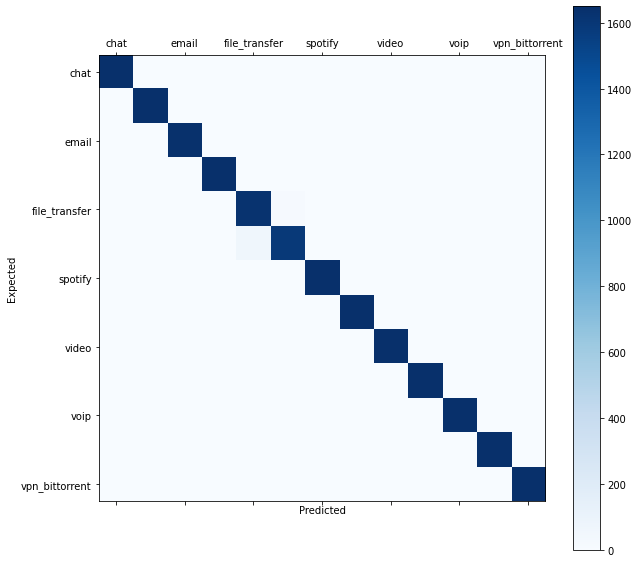

In [ ]:
#f = plt.figure()
#f.set_figwidth(10)
#f.set_figheight(10)
labels = ['chat', 'email' ,'file_transfer', 'spotify' ,'video' ,'voip', 'vpn_bittorrent', 'vpn_chat' ,'vpn_email', 'vpn_file_transfer', 'vpn_spotify',
 'vpn_video', 'vpn_voip']
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(10)
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

# Autoencoder

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs

from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
X_sm = Scaler_X.fit_transform(x_sm)


In [ ]:
X_sm.shape

(107211, 76)

In [ ]:
encoder = Sequential()
encoder.add(Dense(units = 4, 
                  activation = 'relu', 
                  input_shape = [76]))

decoder = Sequential()
decoder.add(Dense(units = 76, 
                  activation = 'relu',
                  input_shape = [4]))

In [ ]:
Autoencoder = Sequential([encoder, decoder])

In [ ]:

from tensorflow.keras.optimizers import Adam

Autoencoder.compile(loss = 'mse', optimizer= 'adam')


In [ ]:
Autoencoder.fit(X_sm,
                X_sm,
                epochs = 100)

Epoch 1/100
3351/3351 [==============================] - 12s 3ms/step - loss: 0.3107
Epoch 2/100
3351/3351 [==============================] - 10s 3ms/step - loss: 0.3107
Epoch 3/100
3351/3351 [==============================] - 7s 2ms/step - loss: 0.3108
Epoch 4/100
3351/3351 [==============================] - 8s 2ms/step - loss: 0.3104
Epoch 5/100
3351/3351 [==============================] - 7s 2ms/step - loss: 0.3107
Epoch 6/100
3351/3351 [==============================] - 7s 2ms/step - loss: 0.3106
Epoch 7/100
3351/3351 [==============================] - 7s 2ms/step - loss: 0.3106
Epoch 8/100
3351/3351 [==============================] - 7s 2ms/step - loss: 0.3107
Epoch 9/100
3351/3351 [==============================] - 7s 2ms/step - loss: 0.3109
Epoch 10/100
3351/3351 [==============================] - 7s 2ms/step - loss: 0.3103
Epoch 11/100
3351/3351 [==============================] - 8s 2ms/step - loss: 0.3107
Epoch 12/100
3351/3351 [==============================] - 7s 2ms/step - 

In [ ]:
features_2d = encoder.predict(X_sm)

In [ ]:
features_2d.shape

(107211, 16)

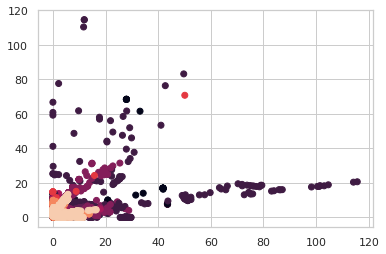

In [ ]:
plt.scatter(features_2d[:,0],features_2d[:,1], c = y_sm);

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.20, random_state=32)
from sklearn.metrics import classification_report

In [ ]:
import time
tic=time.time()
model = KNeighborsClassifier(n_neighbors=2,p=1 )
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
toc=time.time()
print(classification_report(y_test,y_pred,target_names=my_tags))
print("Time Taken with AutoEncoder for KNN:")

print(toc-tic)

                   precision    recall  f1-score   support

             chat       0.94      0.97      0.95      1681
            email       0.98      0.96      0.97      1681
    file_transfer       0.96      0.98      0.97      1626
          spotify       0.92      0.99      0.95      1687
            video       0.80      0.86      0.83      1695
             voip       0.91      0.77      0.83      1589
   vpn_bittorrent       1.00      1.00      1.00      1635
         vpn_chat       0.99      0.98      0.99      1668
        vpn_email       0.99      1.00      1.00      1641
vpn_file_transfer       0.98      0.97      0.98      1622
      vpn_spotify       0.95      0.99      0.97      1597
        vpn_video       0.98      0.96      0.97      1613
         vpn_voip       1.00      0.96      0.98      1708

         accuracy                           0.95     21443
        macro avg       0.95      0.95      0.95     21443
     weighted avg       0.95      0.95      0.95     2

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
knprecision,knrecall,knfscore,supportkn=score(y_test,y_pred,average='macro')
print ('Precision : {}'.format(knprecision))
print ('Recall    : {}'.format(knrecall))
print ('F-score   : {}'.format(knfscore))
#print ('Support   : {}'.format(support))

Precision : 0.9540059613178811
Recall    : 0.9526242033996207
F-score   : 0.952576519805323


In [ ]:
knaccuracy=0.95
knprecision=0.95
knrecall=0.95
knfscore=0.95

In [ ]:
tic=time.time()
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print(classification_report(y_test,y_pred,target_names=my_tags))
toc=time.time()
print("Time Taken for Xgboost with autoencoder:")
print(toc-tic)


                   precision    recall  f1-score   support

             chat       1.00      1.00      1.00      1681
            email       1.00      1.00      1.00      1681
    file_transfer       0.99      0.99      0.99      1626
          spotify       1.00      1.00      1.00      1687
            video       0.96      0.99      0.98      1695
             voip       0.99      0.96      0.98      1589
   vpn_bittorrent       1.00      1.00      1.00      1635
         vpn_chat       1.00      1.00      1.00      1668
        vpn_email       1.00      1.00      1.00      1641
vpn_file_transfer       1.00      1.00      1.00      1622
      vpn_spotify       1.00      1.00      1.00      1597
        vpn_video       1.00      1.00      1.00      1613
         vpn_voip       1.00      1.00      1.00      1708

         accuracy                           1.00     21443
        macro avg       1.00      1.00      1.00     21443
     weighted avg       1.00      1.00      1.00     2

In [ ]:
xgaccuracy=1.00

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
xgprecision,xgrecall,xgfscore,xgsupportdt=score(y_test,y_pred,average='macro')
print ('Precision : {}'.format(xgprecision))
print ('Recall    : {}'.format(xgrecall))
print ('F-score   : {}'.format(xgfscore))
#print ('Support   : {}'.format(support))

Precision : 0.9956727465387893
Recall    : 0.9954233236803286
F-score   : 0.995503644786644


In [ ]:
xgprecision=0.9956
xgrecall=0.9954
xgfscore=0.9955
xgaccuracy=1.00

In [ ]:
tic=time.time()
classifier = DT(criterion='gini', random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred,target_names=my_tags))
toc=time.time()
print("Time Taken for Decision Tree:")
print(toc-tic)

                   precision    recall  f1-score   support

             chat       1.00      1.00      1.00      1681
            email       1.00      1.00      1.00      1681
    file_transfer       0.99      1.00      0.99      1626
          spotify       1.00      1.00      1.00      1687
            video       0.97      0.96      0.96      1695
             voip       0.96      0.97      0.96      1589
   vpn_bittorrent       1.00      1.00      1.00      1635
         vpn_chat       1.00      1.00      1.00      1668
        vpn_email       1.00      1.00      1.00      1641
vpn_file_transfer       1.00      1.00      1.00      1622
      vpn_spotify       1.00      1.00      1.00      1597
        vpn_video       1.00      1.00      1.00      1613
         vpn_voip       1.00      1.00      1.00      1708

         accuracy                           0.99     21443
        macro avg       0.99      0.99      0.99     21443
     weighted avg       0.99      0.99      0.99     2

In [ ]:
dtaccuracy=0.99

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
dtprecision,dtrecall,dtfscore,supportdt=score(y_test,y_pred,average='macro')
print ('Precision : {}'.format(dtprecision))
print ('Recall    : {}'.format(dtrecall))
print ('F-score   : {}'.format(dtfscore))
#print ('Support   : {}'.format(support))

Precision : 0.9936010385170678
Recall    : 0.9936597265972933
F-score   : 0.9936244695376223


In [ ]:
dtprecision=1.00
dtrecall=0.9936
dtfscore=0.9936
dtaccuracy=0.9936

In [ ]:
tic=time.time()
classifier = RF(n_estimators=16, criterion='entropy', random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
toc=time.time()
print(classification_report(y_test,y_pred,target_names=my_tags))

print("Time Taken for Random Forest:")
print(toc-tic)

                   precision    recall  f1-score   support

             chat       0.99      0.99      0.99      1681
            email       1.00      0.99      0.99      1681
    file_transfer       0.99      0.98      0.99      1626
          spotify       1.00      1.00      1.00      1687
            video       0.95      0.97      0.96      1695
             voip       0.96      0.94      0.95      1589
   vpn_bittorrent       1.00      1.00      1.00      1635
         vpn_chat       1.00      1.00      1.00      1668
        vpn_email       1.00      1.00      1.00      1641
vpn_file_transfer       0.99      0.99      0.99      1622
      vpn_spotify       1.00      1.00      1.00      1597
        vpn_video       1.00      1.00      1.00      1613
         vpn_voip       1.00      1.00      1.00      1708

         accuracy                           0.99     21443
        macro avg       0.99      0.99      0.99     21443
     weighted avg       0.99      0.99      0.99     2

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
rfprecision,rfrecall,rffscore,rfsupport=score(y_test,y_pred,average='macro')
print ('Precision : {}'.format(rfprecision))
print ('Recall    : {}'.format(rfrecall))
print ('F-score   : {}'.format(rffscore))
#print ('Support   : {}'.format(support))

Precision : 0.9895005288552999
Recall    : 0.9893721725032172
F-score   : 0.9894190002227858


In [ ]:
rfaccuracy=0.99

In [ ]:
tic=time.time()
clf = svm.SVC(kernel='rbf')
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred,target_names=my_tags))
toc=time.time()
print("Time Taken without PCA:")
print(toc-tic)

                   precision    recall  f1-score   support

             chat       0.68      0.20      0.31      1681
            email       0.55      0.81      0.65      1681
    file_transfer       0.89      0.68      0.77      1626
          spotify       0.72      0.83      0.77      1687
            video       0.62      0.37      0.47      1695
             voip       0.48      0.80      0.60      1589
   vpn_bittorrent       0.88      0.89      0.88      1635
         vpn_chat       0.83      0.91      0.87      1668
        vpn_email       0.98      0.98      0.98      1641
vpn_file_transfer       0.84      0.79      0.81      1622
      vpn_spotify       0.70      0.76      0.73      1597
        vpn_video       0.73      0.75      0.74      1613
         vpn_voip       0.90      0.84      0.87      1708

         accuracy                           0.74     21443
        macro avg       0.75      0.74      0.73     21443
     weighted avg       0.75      0.74      0.73     2

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
svprecision,svrecall,svfscore,rfsupport=score(y_test,y_pred,average='macro')
print ('Precision : {}'.format(svprecision))
print ('Recall    : {}'.format(svrecall))
print ('F-score   : {}'.format(svfscore))
#print ('Support   : {}'.format(support))

Precision : 0.7524208751264809
Recall    : 0.7376670880525314
F-score   : 0.7262460928701266


In [ ]:
svaccuracy=0.74

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
#def calc_specificity(y_actual, y_pred, thresh):
 #   # calculates specificity


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
X_train, X_test, y_train, y_test

# LDA

In [ ]:
# Splitting the data into train and test
X_train,X_test,y_train,y_test=train_test_split(x_sm, y_sm, train_size=0.2, stratify = y_sm, random_state=100)
from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()


In [ ]:

# necessary import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)
  


In [ ]:
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(x_sm, y_sm)

In [ ]:
lda.explained_variance_ratio_

array([8.27839800e-01, 7.38880310e-02, 3.42128731e-02, 1.80918715e-02,
       1.49119628e-02, 9.57806652e-03, 8.01998452e-03, 6.91342946e-03,
       4.09158336e-03, 1.15497394e-03, 8.31638002e-04, 4.65785624e-04])

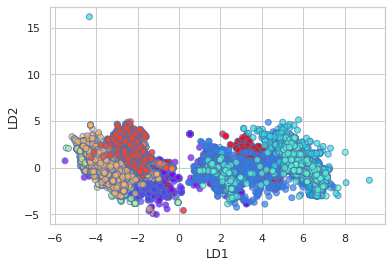

In [ ]:
plt.xlabel('LD1')
plt.ylabel('LD2')

plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y_sm,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_lda, y_sm, random_state=1)

In [ ]:
tic=time.time()
classifier = RF(n_estimators=16, criterion='entropy', random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
toc=time.time()
print(classification_report(y_test,y_pred,target_names=my_tags))

print("Time Taken for Random Forest:")
print(toc-tic)

                   precision    recall  f1-score   support

             chat       0.96      0.97      0.96      2146
            email       0.98      0.97      0.98      2074
    file_transfer       0.97      0.97      0.97      2051
          spotify       0.94      0.99      0.96      2044
            video       0.90      0.87      0.88      2116
             voip       0.90      0.90      0.90      2038
   vpn_bittorrent       0.99      1.00      1.00      2121
         vpn_chat       1.00      0.99      0.99      2114
        vpn_email       1.00      1.00      1.00      2012
vpn_file_transfer       0.98      0.98      0.98      1966
      vpn_spotify       0.98      0.99      0.99      2050
        vpn_video       0.98      0.98      0.98      2039
         vpn_voip       0.99      0.99      0.99      2032

         accuracy                           0.97     26803
        macro avg       0.97      0.97      0.97     26803
     weighted avg       0.97      0.97      0.97     2

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
rfprecision,rfrecall,rffscore,rfsupport=score(y_test,y_pred,average='macro')
print ('Precision : {}'.format(rfprecision))
print ('Recall    : {}'.format(rfrecall))
print ('F-score   : {}'.format(rffscore))
#print ('Support   : {}'.format(support))

Precision : 0.9683784154544719
Recall    : 0.9685416574885365
F-score   : 0.9683950832007153


In [ ]:
rfaccuracy=0.97

In [ ]:
rfprecision

0.9690204575363213

In [ ]:

tic=time.time()
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print(classification_report(y_test,y_pred,target_names=my_tags))
toc=time.time()
print("Time Taken for Xgboost with autoencoder:")
print(toc-tic)


                   precision    recall  f1-score   support

             chat       0.87      0.84      0.85      2146
            email       0.90      0.83      0.86      2074
    file_transfer       0.90      0.86      0.88      2051
          spotify       0.73      0.92      0.82      2044
            video       0.67      0.48      0.56      2116
             voip       0.71      0.81      0.76      2038
   vpn_bittorrent       0.95      0.98      0.96      2121
         vpn_chat       0.97      0.89      0.93      2114
        vpn_email       0.98      1.00      0.99      2012
vpn_file_transfer       0.85      0.88      0.86      1966
      vpn_spotify       0.84      0.89      0.86      2050
        vpn_video       0.83      0.86      0.85      2039
         vpn_voip       0.98      0.98      0.98      2032

         accuracy                           0.86     26803
        macro avg       0.86      0.86      0.86     26803
     weighted avg       0.86      0.86      0.86     2

In [ ]:
xgaccuracy=0.86

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
xgprecision,xgrecall,xgfscore,xgsupport=score(y_test,y_pred,average='macro')
print ('Precision : {}'.format(xgprecision))
print ('Recall    : {}'.format(xgrecall))
print ('F-score   : {}'.format(xgfscore))
#print ('Support   : {}'.format(support))

Precision : 0.8599638587242512
Recall    : 0.8603887087743407
F-score   : 0.857451216664451


In [ ]:
xgaccuracy=0.86
xgprecision=0.859
xgrecall=0.8603
xgfscore=0.8574

In [ ]:
tic=time.time()
classifier = DT(criterion='gini', random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred,target_names=my_tags))
toc=time.time()
print("Time Taken for Decision Tree:")
print(toc-tic)

                   precision    recall  f1-score   support

             chat       0.96      0.95      0.96      2146
            email       0.97      0.97      0.97      2074
    file_transfer       0.96      0.95      0.95      2051
          spotify       0.94      0.96      0.95      2044
            video       0.88      0.85      0.86      2116
             voip       0.88      0.90      0.89      2038
   vpn_bittorrent       0.99      0.99      0.99      2121
         vpn_chat       0.98      0.98      0.98      2114
        vpn_email       1.00      1.00      1.00      2012
vpn_file_transfer       0.97      0.96      0.96      1966
      vpn_spotify       0.97      0.98      0.97      2050
        vpn_video       0.97      0.97      0.97      2039
         vpn_voip       0.99      0.99      0.99      2032

         accuracy                           0.96     26803
        macro avg       0.96      0.96      0.96     26803
     weighted avg       0.96      0.96      0.96     2

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
dtprecision,dtrecall,dtfscore,dtsupport=score(y_test,y_pred,average='macro')
print ('Precision : {}'.format(dtprecision))
print ('Recall    : {}'.format(dtrecall))
print ('F-score   : {}'.format(dtfscore))
#print ('Support   : {}'.format(support))

Precision : 0.9574289735984405
Recall    : 0.9575662210959913
F-score   : 0.9574433511133763


In [ ]:
dtaccuracy=0.963
dtprecision=0.9574
dtrecall=0.9576
dtfscore=0.95744

In [ ]:
dtaccuracy=0.96

In [ ]:
tic=time.time()
clf = svm.SVC(kernel='rbf')
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred,target_names=my_tags))
toc=time.time()
print("Time Taken without PCA:")
print(toc-tic)

                   precision    recall  f1-score   support

             chat       0.62      0.21      0.31      2146
            email       0.59      0.81      0.68      2074
    file_transfer       0.85      0.84      0.85      2051
          spotify       0.70      0.96      0.81      2044
            video       0.69      0.31      0.43      2116
             voip       0.59      0.84      0.69      2038
   vpn_bittorrent       0.87      0.96      0.91      2121
         vpn_chat       0.97      0.88      0.92      2114
        vpn_email       1.00      1.00      1.00      2012
vpn_file_transfer       0.82      0.81      0.82      1966
      vpn_spotify       0.74      0.78      0.76      2050
        vpn_video       0.74      0.78      0.76      2039
         vpn_voip       0.99      0.98      0.98      2032

         accuracy                           0.78     26803
        macro avg       0.78      0.78      0.76     26803
     weighted avg       0.78      0.78      0.76     2

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
svprecision,svrecall,svfscore,svsupport=score(y_test,y_pred,average='macro')
print ('Precision : {}'.format(svprecision))
print ('Recall    : {}'.format(svrecall))
print ('F-score   : {}'.format(svfscore))
#print ('Support   : {}'.format(support))

Precision : 0.7820060543302902
Recall    : 0.7818372899836602
F-score   : 0.7637213036479


In [ ]:
svmaccuracy=0.78

In [ ]:
import time
tic=time.time()
model = KNeighborsClassifier(n_neighbors=2,p=1 )
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
toc=time.time()
print(classification_report(y_test,y_pred,target_names=my_tags))
print("Time Taken with AutoEncoder for KNN:")

print(toc-tic)

                   precision    recall  f1-score   support

             chat       0.95      0.98      0.96      2146
            email       0.98      0.97      0.97      2074
    file_transfer       0.97      0.98      0.97      2051
          spotify       0.92      0.99      0.96      2044
            video       0.85      0.87      0.86      2116
             voip       0.93      0.83      0.88      2038
   vpn_bittorrent       0.99      1.00      1.00      2121
         vpn_chat       0.99      0.99      0.99      2114
        vpn_email       1.00      1.00      1.00      2012
vpn_file_transfer       0.99      0.97      0.98      1966
      vpn_spotify       0.97      0.99      0.98      2050
        vpn_video       0.99      0.97      0.98      2039
         vpn_voip       1.00      0.98      0.99      2032

         accuracy                           0.96     26803
        macro avg       0.96      0.96      0.96     26803
     weighted avg       0.96      0.96      0.96     2

In [ ]:
knaccuracy=0.96
knprecision=0.962
knrecall=0.952
knfscore=0.9622

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
knprecision,svrecall,knfscore,knsupport=score(y_test,y_pred,average='macro')
print ('Precision : {}'.format(knprecision))
print ('Recall    : {}'.format(knrecall))
print ('F-score   : {}'.format(knfscore))
#print ('Support   : {}'.format(support))

Precision : 0.9629285491526203
Recall    : 0.9526242033996207
F-score   : 0.9622722669450133


# CNN

In [ ]:
# Splitting the data into train and test
X_train,X_test,y_train,y_test=train_test_split(x_sm, y_sm, train_size=0.8, stratify = y_sm, random_state=100)

In [ ]:
# import library
from sklearn.preprocessing import StandardScaler
# scale
scale=StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from keras import backend as K


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((85768, 76), (21443, 76), (85768,), (21443,))

In [ ]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [ ]:
# check the shape again
X_train.shape, X_test.shape

((85768, 76, 1), (21443, 76, 1))

In [ ]:
#y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
#y_test = np.asarray(y_test).astype('float32').reshape((-1,1))

In [ ]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

In [ ]:
# Import the libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv1D,Dropout,BatchNormalization
from tensorflow.keras.optimizers import *

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.utils import shuffle

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.metrics import *
# v4

ACCURACY_LIST = []

from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.models import Model

METRICS = [

      BinaryAccuracy(name='accuracy'),
      Precision(name='precision'),
      Recall(name='recall'),
      AUC(name='auc'),
]

In [ ]:
model = Sequential()
model.add(Dense(128, input_dim=76, kernel_initializer='RandomUniform', activation='relu'))
model.add(Dense(256,  kernel_initializer='RandomUniform', activation='relu'))
model.add(Dense(512,  kernel_initializer='RandomUniform', activation='relu'))
model.add(Dense(256,  kernel_initializer='RandomUniform', activation='relu'))
model.add(Dense(512,  kernel_initializer='RandomUniform', activation='relu'))

model.add(Dense(13,activation='softmax'))
#model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=METRICS)

In [ ]:
# compiling the model
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=METRICS)

In [ ]:
%%time
#fitting the model
import time
tic=time.time()
history=model.fit(X_train,y_train,epochs=50, validation_data=(X_test,y_test))
toc=time.time()
print("Time Taken is:")
print(toc-tic)

Epoch 1/50
2681/2681 [==============================] - 32s 11ms/step - loss: 0.8190 - accuracy: 0.9518 - precision: 0.7518 - recall: 0.5571 - auc: 0.9708 - val_loss: 0.6052 - val_accuracy: 0.9600 - val_precision: 0.7817 - val_recall: 0.6656 - val_auc: 0.9833
Epoch 2/50
2681/2681 [==============================] - 32s 12ms/step - loss: 0.5675 - accuracy: 0.9615 - precision: 0.7886 - recall: 0.6831 - auc: 0.9847 - val_loss: 0.5196 - val_accuracy: 0.9628 - val_precision: 0.7719 - val_recall: 0.7323 - val_auc: 0.9866
Epoch 3/50
2681/2681 [==============================] - 45s 17ms/step - loss: 0.5003 - accuracy: 0.9649 - precision: 0.8014 - recall: 0.7233 - auc: 0.9875 - val_loss: 0.4755 - val_accuracy: 0.9657 - val_precision: 0.8016 - val_recall: 0.7367 - val_auc: 0.9880
Epoch 4/50
2681/2681 [==============================] - 34s 13ms/step - loss: 0.4629 - accuracy: 0.9668 - precision: 0.8097 - recall: 0.7434 - auc: 0.9891 - val_loss: 0.4524 - val_accuracy: 0.9678 - val_precision: 0.8080

In [ ]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

In [ ]:
print(classification_report(y_test,predictions ,target_names=my_tags))

                   precision    recall  f1-score   support

             chat       0.75      0.19      0.31      1649
            email       0.61      0.88      0.72      1649
    file_transfer       0.98      0.90      0.94      1649
          spotify       0.76      0.97      0.85      1650
            video       0.81      0.39      0.52      1649
             voip       0.62      0.87      0.73      1649
   vpn_bittorrent       1.00      1.00      1.00      1649
         vpn_chat       0.99      0.97      0.98      1650
        vpn_email       1.00      1.00      1.00      1650
vpn_file_transfer       0.95      0.95      0.95      1650
      vpn_spotify       0.76      0.86      0.80      1649
        vpn_video       0.84      0.72      0.77      1650
         vpn_voip       0.99      1.00      0.99      1650

        micro avg       0.84      0.82      0.83     21443
        macro avg       0.85      0.82      0.81     21443
     weighted avg       0.85      0.82      0.81     2

In [ ]:
predictions = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test,predictions ,target_names=my_tags))

In [ ]:
ann_accuracy=0.98
ann_precision=0.86
ann_recall=0.84
ann_f1score=0.85

In [ ]:
%%time
#fitting the model
import time
tic=time.time()
history=model.fit(X_train,y_train,epochs=50, validation_data=(X_test,y_test))
toc=time.time()
print("Time Taken is:")
print(toc-tic)

In [ ]:
# model
model=Sequential()
# layers
model.add(Conv1D(filters=256, kernel_size=16, activation='relu', input_shape=(76,1)))
model.add(BatchNormalization())
#model.add(Dropout(0.2))

model.add(Conv1D(filters=512, kernel_size=16, activation='relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.5))
model.add(Conv1D(filters=512, kernel_size=16, activation='relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(14,activation='softmax'))

In [ ]:
# compiling the model
model.compile(optimizer=Adam(learning_rate=0.05),loss='categorical_crossentropy',metrics=METRICS)

In [ ]:
%%time
#fitting the model
history=model.fit(X_train,y_train,epochs=50, validation_data=(X_test,y_test))

Epoch 1/50
2207/2887 [=====================>........] - ETA: 11s - loss: 3.4206 - accuracy: 0.9283 - precision: 0.1286 - recall: 4.9205e-04 - auc: 0.5006

KeyboardInterrupt: ignored

# Autoencoder ANN

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs

from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
X_sm = Scaler_X.fit_transform(x_sm)


In [ ]:
encoder = Sequential()
encoder.add(Dense(units = 16, 
                  activation = 'relu', 
                  input_shape = [76]))

decoder = Sequential()
decoder.add(Dense(units = 76, 
                  activation = 'relu',
                  input_shape = [16]))

In [ ]:
Autoencoder = Sequential([encoder, decoder])

In [ ]:
from tensorflow.keras.optimizers import Adam

Autoencoder.compile(loss = 'mse', optimizer= 'adam')

In [ ]:
Autoencoder.fit(X_sm,
                X_sm,
                epochs = 100)

Epoch 1/100
3351/3351 [==============================] - 14s 4ms/step - loss: 0.4032
Epoch 2/100
3351/3351 [==============================] - 12s 4ms/step - loss: 0.2873
Epoch 3/100
3351/3351 [==============================] - 11s 3ms/step - loss: 0.2736
Epoch 4/100
3351/3351 [==============================] - 7s 2ms/step - loss: 0.2644
Epoch 5/100
3351/3351 [==============================] - 7s 2ms/step - loss: 0.2537
Epoch 6/100
3351/3351 [==============================] - 7s 2ms/step - loss: 0.2506
Epoch 7/100
3351/3351 [==============================] - 7s 2ms/step - loss: 0.2501
Epoch 8/100
3351/3351 [==============================] - 7s 2ms/step - loss: 0.2492
Epoch 9/100
3351/3351 [==============================] - 7s 2ms/step - loss: 0.2490
Epoch 10/100
3351/3351 [==============================] - 7s 2ms/step - loss: 0.2487
Epoch 11/100
3351/3351 [==============================] - 7s 2ms/step - loss: 0.2486
Epoch 12/100
3351/3351 [==============================] - 7s 2ms/step -

In [ ]:
features_2d = encoder.predict(X_sm)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features_2d, y_sm, test_size=0.20, random_state=32)
from sklearn.metrics import classification_report

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((85768, 16), (21443, 16), (85768,), (21443,))

In [ ]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

In [ ]:
model = Sequential()
model.add(Dense(128, input_dim=16, kernel_initializer='RandomUniform', activation='relu'))
model.add(Dense(256,  kernel_initializer='RandomUniform', activation='relu'))
model.add(Dense(512,  kernel_initializer='RandomUniform', activation='relu'))
model.add(Dense(256,  kernel_initializer='RandomUniform', activation='relu'))
model.add(Dense(512,  kernel_initializer='RandomUniform', activation='relu'))

model.add(Dense(13,activation='softmax'))
#model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=METRICS)

In [ ]:
# compiling the model
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=METRICS)

In [ ]:
%%time
#fitting the model
import time
tic=time.time()
history=model.fit(X_train,y_train,epochs=50, validation_data=(X_test,y_test))
toc=time.time()
print("Time Taken is:")
print(toc-tic)

Epoch 1/50
2681/2681 [==============================] - 32s 12ms/step - loss: 1.4294 - accuracy: 0.9413 - precision: 0.7601 - recall: 0.3465 - auc: 0.9386 - val_loss: 1.0300 - val_accuracy: 0.9435 - val_precision: 0.7163 - val_recall: 0.4395 - val_auc: 0.9555
Epoch 2/50
2681/2681 [==============================] - 31s 11ms/step - loss: 0.9446 - accuracy: 0.9479 - precision: 0.7409 - recall: 0.4955 - auc: 0.9619 - val_loss: 0.8539 - val_accuracy: 0.9542 - val_precision: 0.7643 - val_recall: 0.5854 - val_auc: 0.9691
Epoch 3/50
2681/2681 [==============================] - 29s 11ms/step - loss: 0.8102 - accuracy: 0.9529 - precision: 0.7629 - recall: 0.5628 - auc: 0.9715 - val_loss: 0.7556 - val_accuracy: 0.9567 - val_precision: 0.7779 - val_recall: 0.6112 - val_auc: 0.9753
Epoch 4/50
2681/2681 [==============================] - 31s 12ms/step - loss: 0.7418 - accuracy: 0.9551 - precision: 0.7691 - recall: 0.5956 - auc: 0.9759 - val_loss: 0.7199 - val_accuracy: 0.9562 - val_precision: 0.7542

In [ ]:
predictions = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test,predictions ,target_names=my_tags))

                   precision    recall  f1-score   support

             chat       0.46      0.35      0.39      1681
            email       0.56      0.80      0.65      1681
    file_transfer       0.93      0.88      0.90      1626
          spotify       0.75      0.94      0.83      1687
            video       0.57      0.69      0.62      1695
             voip       0.56      0.04      0.08      1589
   vpn_bittorrent       0.98      0.85      0.91      1635
         vpn_chat       0.96      0.45      0.62      1668
        vpn_email       0.82      1.00      0.90      1641
vpn_file_transfer       0.64      0.80      0.71      1622
      vpn_spotify       0.73      0.83      0.78      1597
        vpn_video       0.76      0.70      0.73      1613
         vpn_voip       0.99      0.84      0.91      1708

        micro avg       0.74      0.71      0.72     21443
        macro avg       0.75      0.70      0.69     21443
     weighted avg       0.75      0.71      0.70     2

In [ ]:
ann_accuracy=0.972
ann_recall=0.79
ann_precision=0.83
ann_f1score=0.82

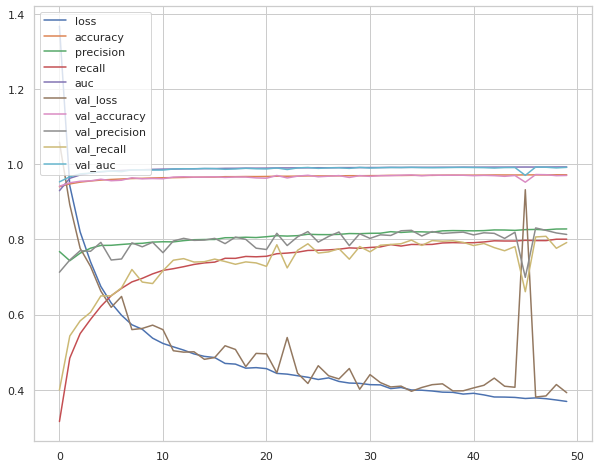

In [ ]:
# plotting
pd.DataFrame(history.history).plot(figsize=(10,8))
plt.grid(True)
plt.show()

In [ ]:
%%time
#fitting the model
import time
tic=time.time()
history=model.fit(X_train,y_train,epochs=50, validation_data=(X_test,y_test))
toc=time.time()
print("Time Taken is:")
print(toc-tic)

Epoch 1/50
2887/2887 [==============================] - 31s 10ms/step - loss: 1.3968 - accuracy: 0.9385 - precision: 0.6855 - recall: 0.2557 - auc: 0.9238 - val_loss: 1.0235 - val_accuracy: 0.9460 - val_precision: 0.7067 - val_recall: 0.4177 - val_auc: 0.9589
Epoch 2/50
2887/2887 [==============================] - 26s 9ms/step - loss: 0.9202 - accuracy: 0.9498 - precision: 0.7135 - recall: 0.4976 - auc: 0.9664 - val_loss: 0.8303 - val_accuracy: 0.9535 - val_precision: 0.7391 - val_recall: 0.5384 - val_auc: 0.9726
Epoch 3/50
2887/2887 [==============================] - 25s 9ms/step - loss: 0.8091 - accuracy: 0.9532 - precision: 0.7290 - recall: 0.5487 - auc: 0.9734 - val_loss: 0.8478 - val_accuracy: 0.9515 - val_precision: 0.7056 - val_recall: 0.5507 - val_auc: 0.9705
Epoch 4/50
2887/2887 [==============================] - 25s 9ms/step - loss: 0.7444 - accuracy: 0.9556 - precision: 0.7393 - recall: 0.5844 - auc: 0.9770 - val_loss: 0.7334 - val_accuracy: 0.9556 - val_precision: 0.7580 - 

In [ ]:
%%time
#fitting the model
import time
tic=time.time()
history=model.fit(X_train,y_train,epochs=300, validation_data=(X_test,y_test))
toc=time.time()
print("Time Taken is:")
print(toc-tic)

Epoch 1/300
2887/2887 [==============================] - 24s 8ms/step - loss: 0.4147 - accuracy: 0.9703 - precision: 0.8030 - recall: 0.7738 - auc: 0.9915 - val_loss: 0.4379 - val_accuracy: 0.9697 - val_precision: 0.7999 - val_recall: 0.7685 - val_auc: 0.9907
Epoch 2/300
2887/2887 [==============================] - 24s 8ms/step - loss: 0.4136 - accuracy: 0.9701 - precision: 0.8021 - recall: 0.7726 - auc: 0.9915 - val_loss: 0.4609 - val_accuracy: 0.9676 - val_precision: 0.7807 - val_recall: 0.7591 - val_auc: 0.9892
Epoch 3/300
2887/2887 [==============================] - 24s 8ms/step - loss: 0.4138 - accuracy: 0.9703 - precision: 0.8025 - recall: 0.7753 - auc: 0.9915 - val_loss: 0.4102 - val_accuracy: 0.9716 - val_precision: 0.8110 - val_recall: 0.7859 - val_auc: 0.9916
Epoch 4/300
2887/2887 [==============================] - 25s 9ms/step - loss: 0.4135 - accuracy: 0.9703 - precision: 0.8030 - recall: 0.7748 - auc: 0.9914 - val_loss: 0.4074 - val_accuracy: 0.9713 - val_precision: 0.8073

In [ ]:
import time

In [ ]:
%%time
#fitting the model
import time
tic=time.time()
history=model.fit(X_train,y_train,epochs=200, validation_data=(X_test,y_test))
toc=time.time()
print("Time Taken is:")
print(toc-tic)

Epoch 1/200
2887/2887 [==============================] - 24s 8ms/step - loss: 0.3018 - accuracy: 0.9772 - precision: 0.8429 - recall: 0.8360 - auc: 0.9951 - val_loss: 0.3654 - val_accuracy: 0.9756 - val_precision: 0.8317 - val_recall: 0.8251 - val_auc: 0.9926
Epoch 2/200
2887/2887 [==============================] - 25s 8ms/step - loss: 0.3004 - accuracy: 0.9772 - precision: 0.8431 - recall: 0.8364 - auc: 0.9952 - val_loss: 0.3715 - val_accuracy: 0.9750 - val_precision: 0.8271 - val_recall: 0.8217 - val_auc: 0.9925
Epoch 3/200
2887/2887 [==============================] - 26s 9ms/step - loss: 0.3010 - accuracy: 0.9773 - precision: 0.8439 - recall: 0.8370 - auc: 0.9951 - val_loss: 0.3924 - val_accuracy: 0.9740 - val_precision: 0.8207 - val_recall: 0.8140 - val_auc: 0.9915
Epoch 4/200
2887/2887 [==============================] - 26s 9ms/step - loss: 0.3023 - accuracy: 0.9771 - precision: 0.8424 - recall: 0.8351 - auc: 0.9951 - val_loss: 0.3923 - val_accuracy: 0.9746 - val_precision: 0.8246

# LDA CNN

In [ ]:
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(x_sm, y_sm)

In [ ]:
lda.explained_variance_ratio_

array([8.27839800e-01, 7.38880310e-02, 3.42128731e-02, 1.80918715e-02,
       1.49119628e-02, 9.57806652e-03, 8.01998452e-03, 6.91342946e-03,
       4.09158336e-03, 1.15497394e-03, 8.31638002e-04, 4.65785624e-04])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_lda, y_sm, random_state=1)

In [ ]:
X_train.shape

(80408, 12)

In [ ]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

In [ ]:
model = Sequential()
model.add(Dense(128, input_dim=12, kernel_initializer='RandomUniform', activation='relu'))
model.add(Dense(256,  kernel_initializer='RandomUniform', activation='relu'))
model.add(Dense(512,  kernel_initializer='RandomUniform', activation='relu'))
model.add(Dense(256,  kernel_initializer='RandomUniform', activation='relu'))
model.add(Dense(512,  kernel_initializer='RandomUniform', activation='relu'))

model.add(Dense(13,activation='softmax'))
#model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=METRICS)

In [ ]:
# compiling the model
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=METRICS)

In [ ]:
%%time
#fitting the model
import time
tic=time.time()
history=model.fit(X_train,y_train,epochs=100, validation_data=(X_test,y_test))
toc=time.time()
print("Time Taken is:")
print(toc-tic)

Epoch 1/100
2513/2513 [==============================] - 42s 16ms/step - loss: 1.0546 - accuracy: 0.9462 - precision: 0.7313 - recall: 0.4745 - auc: 0.9593 - val_loss: 0.7989 - val_accuracy: 0.9521 - val_precision: 0.7947 - val_recall: 0.5094 - val_auc: 0.9730
Epoch 2/100
2513/2513 [==============================] - 30s 12ms/step - loss: 0.7178 - accuracy: 0.9556 - precision: 0.7679 - recall: 0.6065 - auc: 0.9775 - val_loss: 0.6573 - val_accuracy: 0.9577 - val_precision: 0.8143 - val_recall: 0.5839 - val_auc: 0.9811
Epoch 3/100
2513/2513 [==============================] - 30s 12ms/step - loss: 0.6311 - accuracy: 0.9592 - precision: 0.7840 - recall: 0.6474 - auc: 0.9821 - val_loss: 0.6116 - val_accuracy: 0.9606 - val_precision: 0.7887 - val_recall: 0.6671 - val_auc: 0.9829
Epoch 4/100
2513/2513 [==============================] - 28s 11ms/step - loss: 0.5779 - accuracy: 0.9613 - precision: 0.7943 - recall: 0.6714 - auc: 0.9847 - val_loss: 0.5811 - val_accuracy: 0.9585 - val_precision: 0.

In [ ]:
ann_accuracy=0.95
ann_recall=0.85
ann_precision=0.87
ann_f1score=0.86

In [ ]:
predictions = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test,predictions ,target_names=my_tags))

                   precision    recall  f1-score   support

             chat       0.76      0.22      0.34      2146
            email       0.60      0.91      0.72      2074
    file_transfer       0.97      0.96      0.97      2051
          spotify       0.82      0.94      0.88      2044
            video       0.79      0.44      0.56      2116
             voip       0.61      0.91      0.73      2038
   vpn_bittorrent       0.99      1.00      1.00      2121
         vpn_chat       0.99      0.99      0.99      2114
        vpn_email       1.00      1.00      1.00      2012
vpn_file_transfer       0.96      0.98      0.97      1966
      vpn_spotify       0.80      0.95      0.87      2050
        vpn_video       0.94      0.76      0.84      2039
         vpn_voip       0.99      0.99      0.99      2032

        micro avg       0.85      0.85      0.85     26803
        macro avg       0.86      0.85      0.84     26803
     weighted avg       0.86      0.85      0.83     2

In [ ]:
%%time
#fitting the model
import time
tic=time.time()
history=model.fit(X_train,y_train,epochs=200, validation_data=(X_test,y_test))
toc=time.time()
print("Time Taken is:")
print(toc-tic)

Epoch 1/200
2707/2707 [==============================] - 40s 15ms/step - loss: 0.3039 - accuracy: 0.9764 - precision: 0.8362 - recall: 0.8326 - auc: 0.9949 - val_loss: 0.3376 - val_accuracy: 0.9765 - val_precision: 0.8364 - val_recall: 0.8335 - val_auc: 0.9936
Epoch 2/200
2707/2707 [==============================] - 39s 14ms/step - loss: 0.3043 - accuracy: 0.9764 - precision: 0.8364 - recall: 0.8330 - auc: 0.9949 - val_loss: 0.3494 - val_accuracy: 0.9728 - val_precision: 0.8104 - val_recall: 0.8085 - val_auc: 0.9927
Epoch 3/200
2707/2707 [==============================] - 37s 14ms/step - loss: 0.3024 - accuracy: 0.9767 - precision: 0.8382 - recall: 0.8344 - auc: 0.9950 - val_loss: 0.3302 - val_accuracy: 0.9764 - val_precision: 0.8359 - val_recall: 0.8331 - val_auc: 0.9938
Epoch 4/200
2707/2707 [==============================] - 34s 13ms/step - loss: 0.3040 - accuracy: 0.9765 - precision: 0.8367 - recall: 0.8334 - auc: 0.9948 - val_loss: 0.3309 - val_accuracy: 0.9758 - val_precision: 0.

# Hyperparameter tuning

# New section

In [ ]:
dt = DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [ ]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [ ]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
CPU times: user 5.75 s, sys: 315 ms, total: 6.07 s
Wall time: 4min 16s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [ ]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,1.049365,0.036840,0.016263,0.005169,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.21423,0.214273,0.214283,0.214239,0.214256,0.000022,46
1,0.996399,0.101578,0.012246,0.003020,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.21423,0.214273,0.214283,0.214239,0.214256,0.000022,46
2,1.057481,0.062551,0.012009,0.006347,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.21423,0.214273,0.214283,0.214239,0.214256,0.000022,46
3,1.072916,0.038192,0.010687,0.002493,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.21423,0.214273,0.214283,0.214239,0.214256,0.000022,46
4,1.047234,0.148170,0.014629,0.004045,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.21423,0.214273,0.214283,0.214239,0.214256,0.000022,46


In [ ]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=10,
                       random_state=42)

In [ ]:
dt_best = grid_search.best_estimator_

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score


def print_report(y_actual, y_pred, thresh):
   
    #auc = roc_auc_score(y_actual, y_pred)
    precision,recall,f1score,support=score(y_actual,y_test,average='macro')
    accuracy = accuracy_score(y_actual,y_pred)
   # print('AUC:%.3f'%auc)
    print('F1Score:%.3f'%f1score)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('Accuracy:%.3f'%accuracy)
    #print('specificity:%.3f'%specificity)
   # print('prevalence:%.3f'%calc_prevalence(y_actual))
    print(' ')
    return  accuracy,  precision, recall,f1score

In [ ]:
thresh = 0.5
import warnings
warnings.filterwarnings('ignore')

In [ ]:
tic=time.time()
classifier = DT(criterion='entropy', random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred,target_names=my_tags))
toc=time.time()
print("Time Taken for Decision Tree:")
print(toc-tic)

                   precision    recall  f1-score   support

             chat       1.00      1.00      1.00      1649
            email       1.00      1.00      1.00      1649
    file_transfer       0.99      0.99      0.99      1649
          spotify       1.00      1.00      1.00      1650
            video       0.96      0.97      0.96      1649
             voip       0.97      0.96      0.96      1649
   vpn_bittorrent       1.00      1.00      1.00      1649
         vpn_chat       1.00      1.00      1.00      1650
        vpn_email       1.00      1.00      1.00      1650
vpn_file_transfer       1.00      1.00      1.00      1650
      vpn_spotify       1.00      1.00      1.00      1649
        vpn_video       1.00      1.00      1.00      1650
         vpn_voip       1.00      1.00      1.00      1650

         accuracy                           0.99     21443
        macro avg       0.99      0.99      0.99     21443
     weighted avg       0.99      0.99      0.99     2

In [ ]:
print('Decision Tree')
#print('Training:')
#tree_train_accuracy, tree_train_recall, tree_train_precision, \
#tree_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
tree_valid_accuracy, tree_valid_precison, tree_valid_recall, \
tree_valid_f1score = print_report(y_test,y_pred, thresh)

Decision Tree
Validation:
F1Score:1.000
recall:1.000
precision:1.000
Accuracy:0.994
 


In [ ]:
tic=time.time()
classifier = RF(n_estimators=16, criterion='entropy', random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred,target_names=my_tags))
toc=time.time()
print("Time Taken for Random Forest:")
print(toc-tic)

                   precision    recall  f1-score   support

             chat       0.99      0.99      0.99      1649
            email       1.00      1.00      1.00      1649
    file_transfer       0.99      0.98      0.99      1649
          spotify       1.00      1.00      1.00      1650
            video       0.94      0.97      0.95      1649
             voip       0.96      0.94      0.95      1649
   vpn_bittorrent       1.00      1.00      1.00      1649
         vpn_chat       1.00      1.00      1.00      1650
        vpn_email       1.00      1.00      1.00      1650
vpn_file_transfer       1.00      1.00      1.00      1650
      vpn_spotify       1.00      1.00      1.00      1649
        vpn_video       1.00      1.00      1.00      1650
         vpn_voip       1.00      0.99      0.99      1650

         accuracy                           0.99     21443
        macro avg       0.99      0.99      0.99     21443
     weighted avg       0.99      0.99      0.99     2

In [ ]:
print('Random Forest')
#print('Training:')
#tree_train_accuracy, tree_train_recall, tree_train_precision, \
#tree_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
rf_valid_accuracy, rf_valid_precison, rf_valid_recall, \
rf_valid_f1score = print_report(y_test,y_pred, thresh)

Random Forest
Validation:
F1Score:1.000
recall:1.000
precision:1.000
Accuracy:0.989
 


In [ ]:
ann_accuracy=0.98
ann_precision=0.86
ann_recall=0.84
ann_f1score=0.85

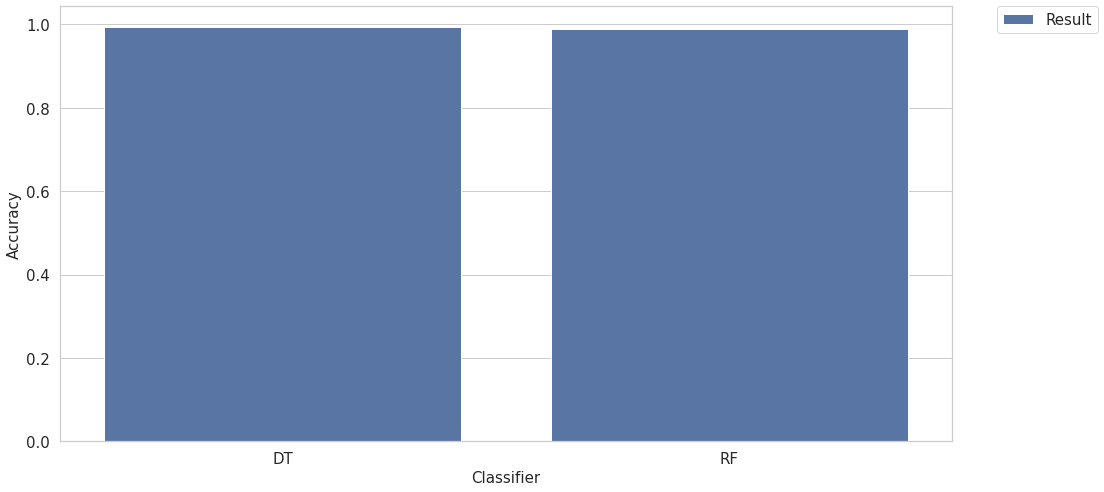

In [ ]:
df_results = pd.DataFrame({'classifier':['DT','RF'],
                           'data_set':['Result']*2,
                           'accuracy':[tree_valid_accuracy,rf_valid_accuracy]})
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")

sns.set_style("whitegrid")
plt.figure(figsize=(16, 8))
ax = sns.barplot(x = 'classifier', y = 'accuracy', hue = 'data_set', data = df_results)
ax.set_xlabel('Classifier', fontsize = 15)
ax.set_ylabel('Accuracy', fontsize = 15)
ax.tick_params(labelsize = 15)

#Separate legend from graph
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0., fontsize = 15)

In [ ]:
tic=time.time()
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
xgb = XGBClassifier(n_estimators=150)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print(classification_report(y_test,y_pred,target_names=my_tags))
toc=time.time()
print("Time Taken for Xgboost:")
print(toc-tic)


                   precision    recall  f1-score   support

             chat       1.00      1.00      1.00      1649
            email       1.00      1.00      1.00      1649
    file_transfer       1.00      0.99      0.99      1649
          spotify       1.00      1.00      1.00      1650
            video       0.95      0.99      0.97      1649
             voip       0.99      0.96      0.97      1649
   vpn_bittorrent       1.00      1.00      1.00      1649
         vpn_chat       1.00      1.00      1.00      1650
        vpn_email       1.00      1.00      1.00      1650
vpn_file_transfer       1.00      1.00      1.00      1650
      vpn_spotify       1.00      1.00      1.00      1649
        vpn_video       1.00      1.00      1.00      1650
         vpn_voip       1.00      1.00      1.00      1650

         accuracy                           1.00     21443
        macro avg       1.00      1.00      1.00     21443
     weighted avg       1.00      1.00      1.00     2

In [ ]:
print('XgBoost')
#print('Training:')
#tree_train_accuracy, tree_train_recall, tree_train_precision, \
#tree_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
xg_valid_accuracy, xg_valid_precison, xg_valid_recall, \
xg_valid_f1score = print_report(y_test,y_pred, thresh)

XgBoost
Validation:
F1Score:1.000
recall:1.000
precision:1.000
Accuracy:0.995
 


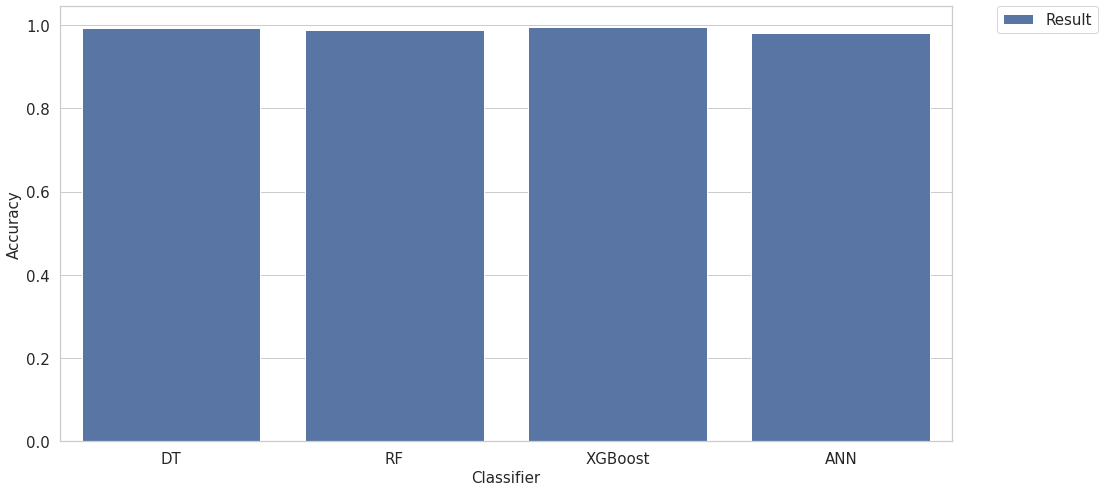

In [ ]:
df_results = pd.DataFrame({'classifier':['DT','RF','XGBoost','ANN'],
                           'data_set':['Result']*4,
                           'accuracy':[tree_valid_accuracy,rf_valid_accuracy,xg_valid_accuracy,ann_accuracy],
                           'Recall':[tree_valid_recall,rf_valid_recall,xg_valid_recall,ann_recall],
                            'Precision':[tree_valid_precison,rf_valid_precison,xg_valid_precison,ann_precision]})
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")

sns.set_style("whitegrid")
plt.figure(figsize=(16, 8))
ax = sns.barplot(x = 'classifier', y = 'accuracy', hue = 'data_set', data = df_results)
ax.set_xlabel('Classifier', fontsize = 15)
ax.set_ylabel('Accuracy', fontsize = 15)
ax.tick_params(labelsize = 15)

#Separate legend from graph
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0., fontsize = 15)

In [ ]:
df_results = pd.DataFrame({'classifier':['DT','RF','XGBoost','ANN'],
                           'data_set':['Result']*4,
                           'accuracy':[tree_valid_accuracy,rf_valid_accuracy,xg_valid_accuracy,ann_accuracy],
                           'Recall':[tree_valid_recall,rf_valid_recall,xg_valid_recall,ann_recall],
                            'Precision':[tree_valid_precison,rf_valid_precison,xg_valid_precison,ann_precision]})

In [ ]:
df_results = pd.DataFrame({'classifier':['Accuracy','Accuracy','Accuracy','Accuracy','Recall','Recall','Recall','Recall','Precision','Precision','Precision','Precision'],
                           'data_set':['Decision Tree','Random Forest','XGBoost','ANN']*3,
                           'accuracy':[tree_valid_accuracy,rf_valid_accuracy,xg_valid_accuracy,ann_accuracy,tree_valid_recall,rf_valid_recall,xg_valid_recall,ann_recall,tree_valid_precison,rf_valid_precison,xg_valid_precison,ann_precision]
                           })

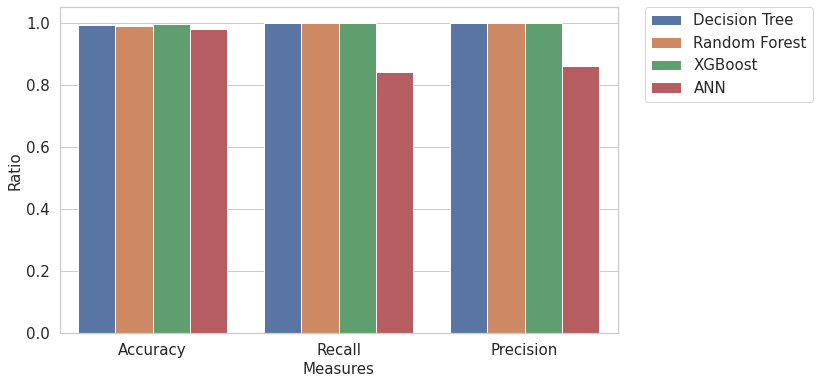

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x = 'classifier', y = 'accuracy', hue = 'data_set', data = df_results)
ax.set_xlabel('Measures', fontsize = 15)
ax.set_ylabel('Ratio', fontsize = 15)
ax.tick_params(labelsize = 15)

#Separate legend from graph
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0., fontsize = 15)

In [ ]:
df_results = pd.DataFrame({'classifier':['Accuracy','Accuracy','Accuracy','Accuracy','Recall','Recall','Recall','Recall','Precision','Precision','Precision','Precision','F1-Score','F1-Score','F1-Score','F1-Score'],
                           'data_set':['Decision Tree','Random Forest','XGBoost','ANN']*4,
                           'accuracy':[tree_valid_accuracy,rf_valid_accuracy,xg_valid_accuracy,ann_accuracy,tree_valid_recall,rf_valid_recall,xg_valid_recall,ann_recall,tree_valid_precison,rf_valid_precison,xg_valid_precison,ann_precision,tree_valid_f1score,rf_valid_f1score,xg_valid_f1score,ann_f1score]
                           })

In [ ]:
sns.set_style('darkgrid')

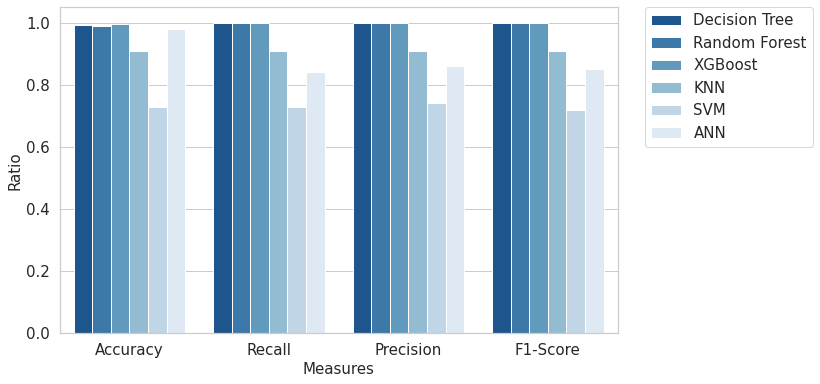

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x = 'classifier', y = 'accuracy', hue = 'data_set', data = df_results,palette = "Blues_r")
ax.set_xlabel('Measures', fontsize = 15)
ax.set_ylabel('Ratio', fontsize = 15)
ax.tick_params(labelsize = 15)

#Separate legend from graph
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0., fontsize = 15)

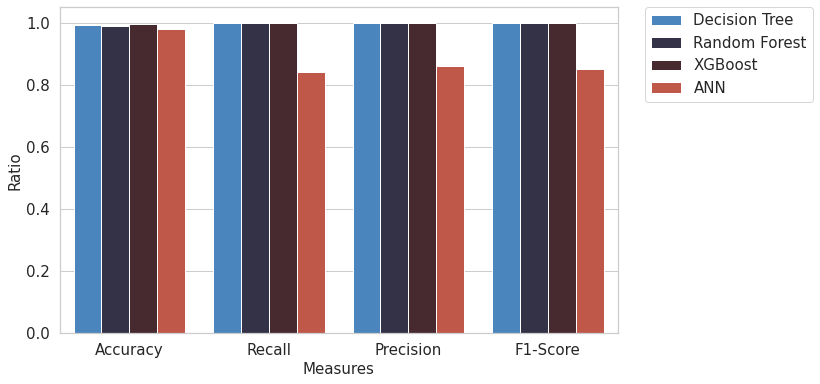

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x = 'classifier', y = 'accuracy', hue = 'data_set', data = df_results,palette = 'icefire')
ax.set_xlabel('Measures', fontsize = 15)
ax.set_ylabel('Ratio', fontsize = 15)
ax.tick_params(labelsize = 15)

#Separate legend from graph
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0., fontsize = 15)

In [ ]:
# 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magm...

In [ ]:
kn_valid_accuracy, kn_valid_precison, kn_valid_recall, \
kn_valid_f1score = print_report(y_test,y_preds, thresh)

F1Score:1.000
recall:1.000
precision:1.000
Accuracy:0.910
 


In [ ]:
svm_valid_accuracy, svm_valid_precison, svm_valid_recall, \
svm_valid_f1score = print_report(y_test,y_pred, thresh)

F1Score:1.000
recall:1.000
precision:1.000
Accuracy:0.729
 


In [ ]:
svmprecision,svmrecall,svmfscore

In [ ]:
df_results = pd.DataFrame({'classifier':['Accuracy','Accuracy','Accuracy','Accuracy','Accuracy','Accuracy','Recall','Recall','Recall','Recall','Recall','Recall','Precision','Precision','Precision','Precision','Precision','Precision','F1-Score','F1-Score','F1-Score','F1-Score','F1-Score','F1-Score'],
                           'data_set':['Decision Tree','Random Forest','XGBoost','KNN','SVM','ANN']*4,
                           'accuracy':[tree_valid_accuracy,rf_valid_accuracy,xg_valid_accuracy,knaccuracy,svmaccuracy,ann_accuracy,tree_valid_recall,rf_valid_recall,xg_valid_recall,knrecall,svmrecall,ann_recall,tree_valid_precison,rf_valid_precison,xg_valid_precison,knprecision,svmprecision,ann_precision,tree_valid_f1score,rf_valid_f1score,xg_valid_f1score,knfscore,svmfscore,ann_f1score]
                           })

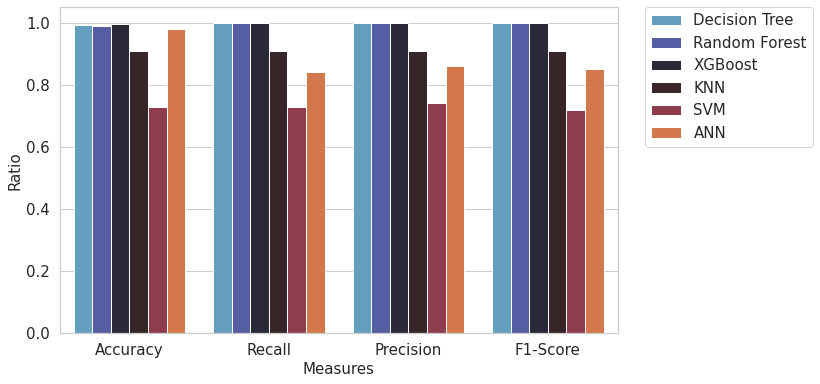

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x = 'classifier', y = 'accuracy', hue = 'data_set', data = df_results,palette = 'icefire')
ax.set_xlabel('Measures', fontsize = 15)
ax.set_ylabel('Ratio', fontsize = 15)
ax.tick_params(labelsize = 15)

#Separate legend from graph
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0., fontsize = 15)

**Autoencoder Result**

In [ ]:
df_results = pd.DataFrame({'classifier':['Accuracy','Accuracy','Accuracy','Accuracy','Accuracy','Accuracy','Recall','Recall','Recall','Recall','Recall','Recall','Precision','Precision','Precision','Precision','Precision','Precision','F1-Score','F1-Score','F1-Score','F1-Score','F1-Score','F1-Score'],
                           'data_set':['Decision Tree','Random Forest','XGBoost','KNN','SVM','ANN']*4,
                           'accuracy':[dtaccuracy,rfaccuracy,xgaccuracy,knaccuracy,svaccuracy,ann_accuracy,dtrecall,rfrecall,xgrecall,knrecall,svrecall,ann_recall,dtprecision,rfprecision,xgprecision,knprecision,svprecision,ann_precision,dtfscore,rffscore,xgfscore,knfscore,svfscore,ann_f1score]
                           })

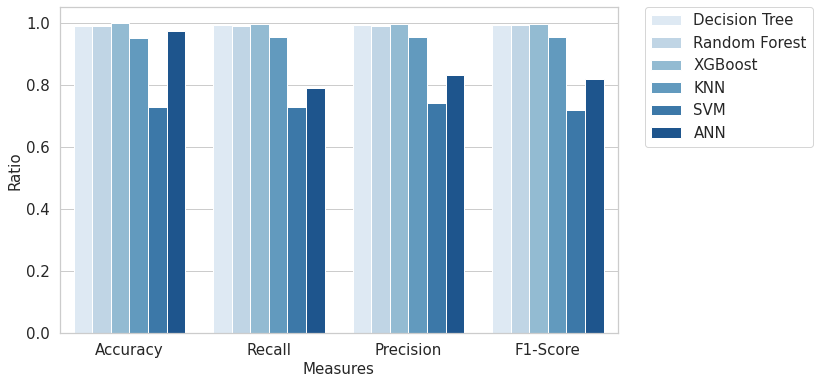

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x = 'classifier', y = 'accuracy', hue = 'data_set', data = df_results,palette = "Blues")
ax.set_xlabel('Measures', fontsize = 15)
ax.set_ylabel('Ratio', fontsize = 15)
ax.tick_params(labelsize = 15)

#Separate legend from graph
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0., fontsize = 15)

**LDA Results**

In [ ]:
df_results = pd.DataFrame({'classifier':['Accuracy','Accuracy','Accuracy','Accuracy','Accuracy','Accuracy','Recall','Recall','Recall','Recall','Recall','Recall','Precision','Precision','Precision','Precision','Precision','Precision','F1-Score','F1-Score','F1-Score','F1-Score','F1-Score','F1-Score'],
                           'data_set':['Decision Tree','Random Forest','XGBoost','KNN','SVM','ANN']*4,
                           'accuracy':[dtaccuracy,rfaccuracy,xgaccuracy,knaccuracy,svaccuracy,ann_accuracy,dtrecall,rfrecall,xgrecall,knrecall,svrecall,ann_recall,dtprecision,rfprecision,xgprecision,knprecision,svprecision,ann_precision,dtfscore,rffscore,xgfscore,knfscore,svfscore,ann_f1score]
                           })

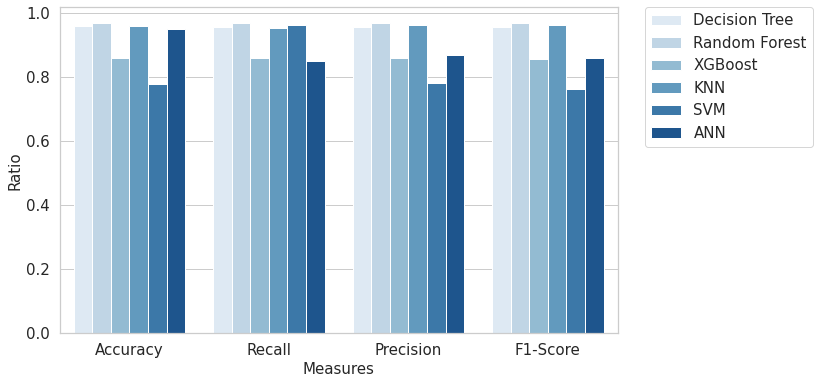

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x = 'classifier', y = 'accuracy', hue = 'data_set', data = df_results,palette = "Blues")
ax.set_xlabel('Measures', fontsize = 15)
ax.set_ylabel('Ratio', fontsize = 15)
ax.tick_params(labelsize = 15)

#Separate legend from graph
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0., fontsize = 15)

In [ ]:
df_results = pd.DataFrame({'classifier':['Accuracy','Accuracy','Accuracy','Accuracy','Recall','Recall','Recall','Recall','Precision','Precision','Precision','Precision','F1-Score','F1-Score','F1-Score','F1-Score'],
                           'data_set':['Decision Tree','KNN','XGBoost','ANN']*4,
                           'accuracy':[dtaccuracy,knaccuracy,xgaccuracy,ann_accuracy,dtrecall,knrecall,xgrecall,ann_recall,dtprecision,knprecision,xgprecision,ann_precision,dtfscore,knfscore,xgfscore,ann_f1score]
                           })

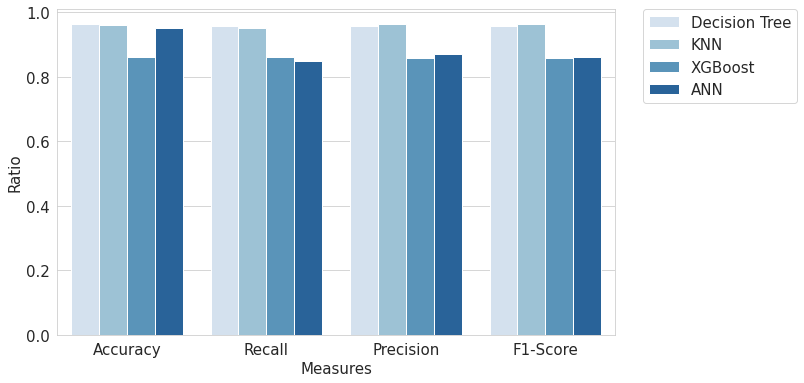

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x = 'classifier', y = 'accuracy', hue = 'data_set', data = df_results,palette = "Blues")
ax.set_xlabel('Measures', fontsize = 15)
ax.set_ylabel('Ratio', fontsize = 15)
ax.tick_params(labelsize = 15)

#Separate legend from graph
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0., fontsize = 15)